In [71]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import pandas as pd
import statsmodels.formula.api as smf

%matplotlib inline

### Load Scores and Profile Sizes

In [72]:
def getScores():
    resultDir = "../results/"
    if not os.path.exists(resultDir):
        os.makedirs(resultDir)
    size = loadProfileSizes()

In [73]:
def loadProfileSizes():
    profileSize = dict()
    inFile = open("../data/ProfileSizes.txt")

    for line in inFile:
        entity, size = line.strip().split("\t")
        entity = entity.replace("#profile","")
        entity = entity.replace("http://purl.obolibrary.org/obo/","")
        profileSize[entity] = int(size)

    inFile.close()
    return profileSize

In [74]:
def loadProfiles():
    inFile = open("../data/Scores_Sizes.txt")

    scores = []
    geneProfileSizes = []
    taxonProfileSizes = []

    rawscores = []
    rawGeneProfileSizes = []
    rawTaxonProfileSizes = []

    for line in inFile:
        if "Score" not in line:
            data = line.strip().split("\t")
            score = float(data[6])
            scores.append(score)
            rawGeneProfileSizes.append(int(data[1]))
            rawTaxonProfileSizes.append(int(data[4]))
    inFile.close()
    return scores, rawTaxonProfileSizes, rawGeneProfileSizes

In [75]:
getScores()
scores, rawTaxonProfileSizes, rawGeneProfileSizes = loadProfiles()

### Log Transformation

Run log transformation on scores, taxon sizes, and gene sizes.

In [76]:
scoresLog = list(scores)

for x in range(0, len(scoresLog)):
    if scoresLog[x] != 0:
        scoresLog[x] = math.log(scoresLog[x])

In [77]:
taxonLog = list(rawTaxonProfileSizes)

for x in range(0, len(taxonLog)):
    if taxonLog[x] != 0:
        taxonLog[x] = math.log(taxonLog[x])

In [78]:
geneLog = list(rawGeneProfileSizes)

for x in range(0, len(geneLog)):
    if geneLog[x] != 0:
        geneLog[x] = math.log(geneLog[x])

# Taxon Profile Sizes

Let's load the data into a Pandas DataFrame so we can start to filter the data and create more granular plots.

In [79]:
taxonAndScores = pd.DataFrame(
    {
        'taxon': rawTaxonProfileSizes,
        'scores': scores
    })
taxonAndScores.head()

,scores,taxon
0,0.096137,22
1,0.329889,162
2,0.329889,157
3,0.379192,1029
4,0.065285,34


In [80]:
taxonAndScoresLog = pd.DataFrame(
    {
        'taxon': rawTaxonProfileSizes,
        'scoresLog': scoresLog
    })
taxonAndScoresLog.head()

,scoresLog,taxon
0,-2.341980,22
1,-1.108998,162
2,-1.108998,157
3,-0.969712,1029
4,-2.728988,34


In [81]:
taxonLogAndScores = pd.DataFrame(
    {
        'taxonLog': taxonLog,
        'scores': scores
    })
taxonLogAndScores.head()

,scores,taxonLog
0,0.096137,3.091042
1,0.329889,5.087596
2,0.329889,5.056246
3,0.379192,6.936343
4,0.065285,3.526361


In [82]:
taxonLogAndScoresLog = pd.DataFrame(
    {
        'taxonLog': taxonLog,
        'scoresLog': scoresLog
    })
taxonLogAndScoresLog.head()

,scoresLog,taxonLog
0,-2.341980,3.091042
1,-1.108998,5.087596
2,-1.108998,5.056246
3,-0.969712,6.936343
4,-2.728988,3.526361


In [83]:
taxonAndAvgScores = taxonAndScores.groupby('taxon', as_index=False)['scores'].mean()
taxonAndAvgScores.rename(columns={'scores':'avgScores'}, inplace=True)
taxonAndAvgScores.head()

,taxon,avgScores
0,2,0.146084
1,3,0.169026
2,4,0.176314
3,5,0.169552
4,6,0.208292


In [84]:
taxonAndAvgScoresLog = taxonAndScoresLog.groupby('taxon', as_index=False)['scoresLog'].mean()
taxonAndAvgScoresLog.rename(columns={'scoresLog':'avgScoresLog'}, inplace=True)
taxonAndAvgScoresLog.head()

,taxon,avgScoresLog
0,2,-2.206040
1,3,-1.707504
2,4,-1.994858
3,5,-2.011393
4,6,-1.806052


In [85]:
taxonLogAndAvgScores = taxonLogAndScores.groupby('taxonLog', as_index=False)['scores'].mean()
taxonLogAndAvgScores.rename(columns={'scores':'avgScores'}, inplace=True)
taxonLogAndAvgScores.head()

,taxonLog,avgScores
0,0.693147,0.146084
1,1.098612,0.169026
2,1.386294,0.176314
3,1.609438,0.169552
4,1.791759,0.208292


In [86]:
taxonLogAndAvgScoresLog = taxonLogAndScoresLog.groupby('taxonLog', as_index=False)['scoresLog'].mean()
taxonLogAndAvgScoresLog.rename(columns={'scoresLog':'avgScoresLog'}, inplace=True)
taxonLogAndAvgScoresLog.head()

,taxonLog,avgScoresLog
0,0.693147,-2.206040
1,1.098612,-1.707504
2,1.386294,-1.994858
3,1.609438,-2.011393
4,1.791759,-1.806052


## Plotting Taxon Size vs. Average Score

The following are scatter plots of taxon size vs. average score. There are 4 differents plots using both the raw data, as well as the log-transformed data.

### Taxon Size vs. Average Score

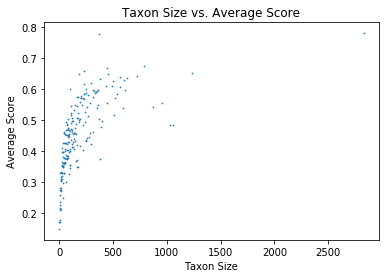

In [87]:
taxonAndAvgScores.plot('taxon', 'avgScores', s=0.5, kind='scatter', title='Taxon Size vs. Average Score')
plt.xlabel('Taxon Size')
plt.ylabel('Average Score')

### Taxon Size vs. Average Log(Score)

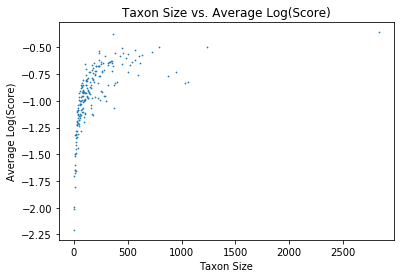

In [88]:
taxonAndAvgScoresLog.plot('taxon', 'avgScoresLog', s=0.5, kind='scatter', title='Taxon Size vs. Average Log(Score)')
plt.xlabel('Taxon Size')
plt.ylabel('Average Log(Score)')

### Log(Taxon Size) vs. Average Score

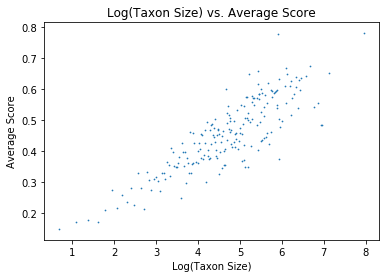

In [89]:
taxonLogAndAvgScores.plot('taxonLog', 'avgScores', s=0.5, kind='scatter', title='Log(Taxon Size) vs. Average Score')
plt.xlabel('Log(Taxon Size)')
plt.ylabel('Average Score')

### Log(Taxon Size) vs. Average Log(Score)

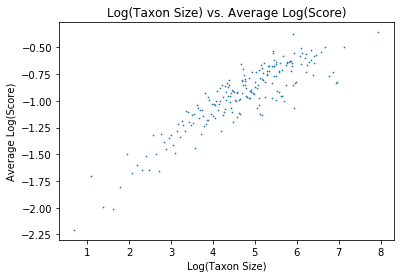

In [90]:
taxonLogAndAvgScoresLog.plot('taxonLog', 'avgScoresLog', s=0.5, kind='scatter', title='Log(Taxon Size) vs. Average Log(Score)')
plt.xlabel('Log(Taxon Size)')
plt.ylabel('Average Log(Score)')

## Choosing the Sets

It looks like Log(Taxon Size) vs. Average Log(Score) has the best shape. We will continue to use this set when building regressions.

Also, we can try running regressions on Taxon Size vs. Average Log(Score) for small Taxa to compare results.

# Linear Regression

## Small Taxon vs. Average Log(Score)

In [91]:
smallTaxon = taxonAndAvgScoresLog[taxonAndAvgScoresLog['taxon'] < 50]
resultsSmallTaxon = smf.ols(formula='avgScoresLog ~ taxon', data=smallTaxon).fit()
minMaxSmallTaxon = pd.DataFrame({'taxon': [smallTaxon.taxon.min(), smallTaxon.taxon.max()]})
predsSmallTaxon = resultsSmallTaxon.predict(minMaxSmallTaxon)

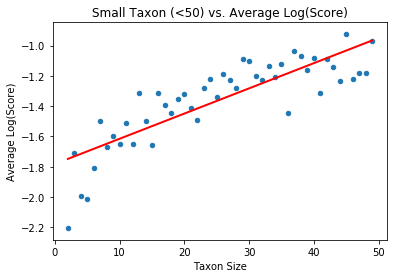

In [92]:
smallTaxon.plot('taxon', 'avgScoresLog', kind='scatter', title='Small Taxon (<50) vs. Average Log(Score)')
plt.xlabel('Taxon Size')
plt.ylabel('Average Log(Score)')

plt.plot(minMaxSmallTaxon, predsSmallTaxon, c='red', linewidth=2)

### Residuals

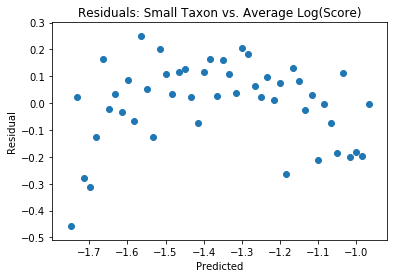

In [93]:
residualsSmallTaxon = []
actualSmallTaxon = list(smallTaxon.avgScoresLog)
predictedSmallTaxon = resultsSmallTaxon.fittedvalues

for x in range(0, len(actualSmallTaxon)):
    actualScore = actualSmallTaxon[x]
    predictedScore = predictedSmallTaxon[x]
    residual = actualScore - predictedScore
    residualsSmallTaxon.append(residual)
    
plt.scatter(np.array(predictedSmallTaxon), np.array(residualsSmallTaxon))
plt.title('Residuals: Small Taxon vs. Average Log(Score)')
plt.xlabel('Predicted')
plt.ylabel('Residual')

## Log(Taxon Size) vs. Average Log(Score)

In [94]:
resultsTaxonLog = smf.ols(formula='avgScoresLog ~ taxonLog', data=taxonLogAndAvgScoresLog).fit()
minMaxTaxonLog = pd.DataFrame({'taxonLog': [taxonLogAndAvgScoresLog.taxonLog.min(), taxonLogAndAvgScoresLog.taxonLog.max()]})
predsTaxonLog = resultsTaxonLog.predict(minMaxTaxonLog)

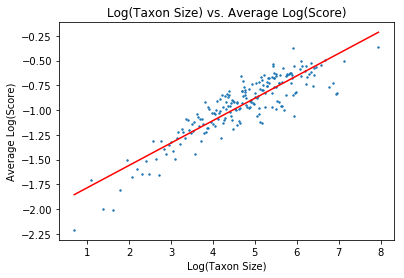

In [95]:
taxonLogAndAvgScoresLog.plot('taxonLog', 'avgScoresLog', s=2, kind='scatter', title='Log(Taxon Size) vs. Average Log(Score)')
plt.xlabel('Log(Taxon Size)')
plt.ylabel('Average Log(Score)')

plt.plot(minMaxTaxonLog, predsTaxonLog, c='red', linewidth=1.5)

# ----- Update for Friday, March 16 -----


## Regression Results

Numerical summaries of regression results

In [96]:
# print the coefficients
resultsTaxonLog.params

Intercept   -2.009961
taxonLog     0.225997
dtype: float64

In [97]:
# print the confidence intervals for the model coefficients
resultsTaxonLog.conf_int()

,0,1
Intercept,-2.086469,-1.933453
taxonLog,0.210164,0.241830


In [98]:
# print the p-values for the model coefficients
resultsTaxonLog.pvalues

Intercept    3.159441e-118
taxonLog      1.171414e-71
dtype: float64

In [99]:
# print the r-squared value for the model
resultsTaxonLog.rsquared

0.79761766223849895

In [100]:
# print the full regression summary
resultsTaxonLog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avgScoresLog   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     792.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.17e-71
Time:                        15:38:28   Log-Likelihood:                 114.24
No. Observations:                 203   AIC:                            -224.5
Df Residuals:                     201   BIC:                            -217.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0100      0.039    -51.802      0.000      -2.086      -1.933
taxonLog       0.2260      0.008     28.146      0.000       0.210       0.242
==============================================================================
Omnibus:                       13.479   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.371
Skew:                          -0.643   Prob(JB):                     0.000757
Kurtosis:                       3.213   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# --------------------------------------------------

### Residuals

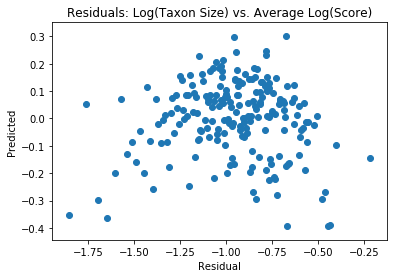

In [135]:
residualsTaxonLog = []
actualTaxonLog = list(taxonLogAndAvgScoresLog.avgScoresLog)
predictedTaxonLog = resultsTaxonLog.fittedvalues

for x in range(0, len(actualTaxonLog)):
    actualScore = actualTaxonLog[x]
    predictedScore = predictedTaxonLog[x]
    residual = actualScore - predictedScore
    residualsTaxonLog.append(residual)
    
plt.scatter(np.array(predictedTaxonLog), np.array(residualsTaxonLog))
plt.title('Residuals: Log(Taxon Size) vs. Average Log(Score)')
plt.ylabel('Predicted')
plt.xlabel('Residual')

# Gene Profile Sizes

Now let's look at gene profile sizes vs. scores.

In [102]:
geneAndScores = pd.DataFrame(
    {
        'gene': rawGeneProfileSizes,
        'scores': scores
    })
geneAndScores.head()

,gene,scores
0,15,0.096137
1,15,0.329889
2,15,0.329889
3,15,0.379192
4,15,0.065285


In [103]:
geneAndScoresLog = pd.DataFrame(
    {
        'gene': rawGeneProfileSizes,
        'scoresLog': scoresLog
    })
geneAndScoresLog.head()

,gene,scoresLog
0,15,-2.341980
1,15,-1.108998
2,15,-1.108998
3,15,-0.969712
4,15,-2.728988


In [105]:
geneLogAndScores = pd.DataFrame(
    {
        'geneLog': geneLog,
        'scores': scores
    })
geneLogAndScores.head()

,geneLog,scores
0,2.70805,0.096137
1,2.70805,0.329889
2,2.70805,0.329889
3,2.70805,0.379192
4,2.70805,0.065285


In [106]:
geneLogAndScoresLog = pd.DataFrame(
    {
        'geneLog': geneLog,
        'scoresLog': scoresLog
    })
geneLogAndScoresLog.head()

,geneLog,scoresLog
0,2.70805,-2.341980
1,2.70805,-1.108998
2,2.70805,-1.108998
3,2.70805,-0.969712
4,2.70805,-2.728988


In [107]:
geneAndAvgScores = geneAndScores.groupby('gene', as_index=False)['scores'].mean()
geneAndAvgScores.rename(columns={'scores':'avgScores'}, inplace=True)
geneAndAvgScores.head()

,gene,avgScores
0,2,0.142727
1,3,0.249560
2,4,0.237031
3,5,0.274980
4,6,0.297623


In [108]:
geneAndAvgScoresLog = geneAndScoresLog.groupby('gene', as_index=False)['scoresLog'].mean()
geneAndAvgScoresLog.rename(columns={'scoresLog':'avgScoresLog'}, inplace=True)
geneAndAvgScoresLog.head()

,gene,avgScoresLog
0,2,-0.823050
1,3,-1.521482
2,4,-1.677779
3,5,-1.660588
4,6,-1.698478


In [109]:
geneLogAndAvgScores = geneLogAndScores.groupby('geneLog', as_index=False)['scores'].mean()
geneLogAndAvgScores.rename(columns={'scores':'avgScores'}, inplace=True)
geneLogAndAvgScores.head()

,geneLog,avgScores
0,0.693147,0.142727
1,1.098612,0.249560
2,1.386294,0.237031
3,1.609438,0.274980
4,1.791759,0.297623


In [110]:
geneLogAndAvgScoresLog = geneLogAndScoresLog.groupby('geneLog', as_index=False)['scoresLog'].mean()
geneLogAndAvgScoresLog.rename(columns={'scoresLog':'avgScoresLog'}, inplace=True)
geneLogAndAvgScoresLog.head()

,geneLog,avgScoresLog
0,0.693147,-0.823050
1,1.098612,-1.521482
2,1.386294,-1.677779
3,1.609438,-1.660588
4,1.791759,-1.698478


## Plotting Gene Size vs. Average Score

The following are scatter plots of gene size vs. average score. There are 4 differents plots using both the raw data, as well as the log-transformed data.

### Gene Size vs. Average Score

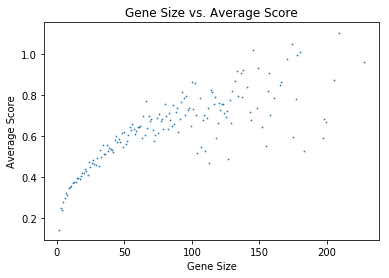

In [111]:
geneAndAvgScores.plot('gene', 'avgScores', s=0.5, kind='scatter', title='Gene Size vs. Average Score')
plt.xlabel('Gene Size')
plt.ylabel('Average Score')

### Gene Size vs. Average Log(Score)

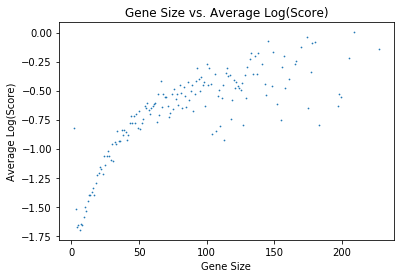

In [112]:
geneAndAvgScoresLog.plot('gene', 'avgScoresLog', s=0.5, kind='scatter', title='Gene Size vs. Average Log(Score)')
plt.xlabel('Gene Size')
plt.ylabel('Average Log(Score)')

### Log(Gene Size) vs. Average Score

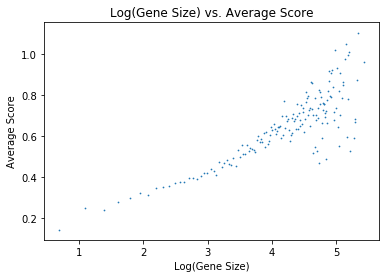

In [113]:
geneLogAndAvgScores.plot('geneLog', 'avgScores', s=0.5, kind='scatter', title='Log(Gene Size) vs. Average Score')
plt.xlabel('Log(Gene Size)')
plt.ylabel('Average Score')

### Log(Gene Size) vs. Average Log(Score)

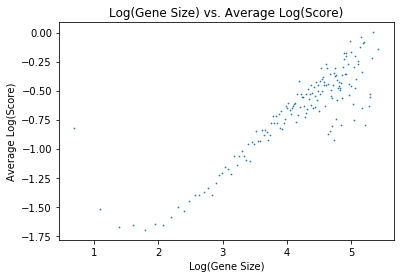

In [114]:
geneLogAndAvgScoresLog.plot('geneLog', 'avgScoresLog', s=0.5, kind='scatter', title='Log(Gene Size) vs. Average Log(Score)')
plt.xlabel('Log(Gene Size)')
plt.ylabel('Average Log(Score)')

## Choosing the Sets

It looks like Log(Gene Size) vs. Average Log(Score) has the best shape. We will use this set for the rest of our analysis + linear regressions.

# Linear Regression

## Small Gene vs. Average Log(Score)

Remove the outlier from the plot where geneSize < 2. This single point was skewing the regression.

In [115]:
smallGene = geneAndAvgScoresLog[(geneAndAvgScoresLog['gene'] > 2) & (geneAndAvgScoresLog['gene'] < 50)]
resultsSmallGene = smf.ols(formula='avgScoresLog ~ gene', data=smallGene).fit()
minMaxSmallGene = pd.DataFrame({'gene': [smallGene.gene.min(), smallGene.gene.max()]})
predsSmallGene = resultsSmallGene.predict(minMaxSmallGene)

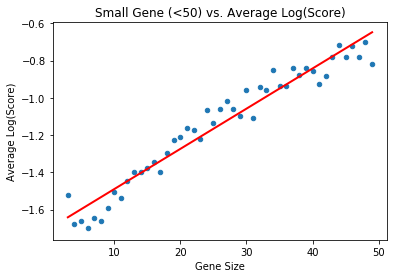

In [116]:
smallGene.plot('gene', 'avgScoresLog', kind='scatter', title='Small Gene (<50) vs. Average Log(Score)')
plt.xlabel('Gene Size')
plt.ylabel('Average Log(Score)')

plt.plot(minMaxSmallGene, predsSmallGene, c='red', linewidth=2)

### Residuals

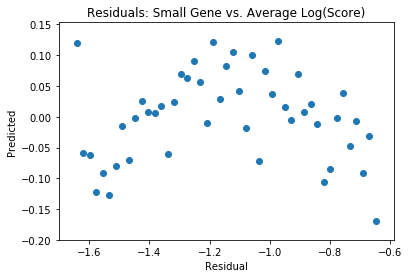

In [136]:
residualsSmallGene = []
actualSmallGene = list(smallGene.avgScoresLog)
predictedSmallGene = resultsSmallGene.fittedvalues

# For some reason, the predictedSmallGene Series started at index 1.
# Reset the index so it starts at 0.
predictedSmallGene.reset_index(drop=True, inplace=True)

for x in range(0, len(actualSmallGene)):
    actualScore = actualSmallGene[x]
    predictedScore = predictedSmallGene[x]
    residual = actualScore - predictedScore
    residualsSmallGene.append(residual)
    
plt.scatter(np.array(predictedSmallGene), np.array(residualsSmallGene))
plt.title('Residuals: Small Gene vs. Average Log(Score)')
plt.ylabel('Predicted')
plt.xlabel('Residual')

## Log(Gene Size) vs. Average Log(Score)

Remove the outlier from the plot where log(geneSize) < 0.7. This single point was skewing the regression.

In [118]:
geneLog = geneLogAndAvgScoresLog[geneLogAndAvgScoresLog['geneLog'] > 0.7]
resultsGeneLog = smf.ols(formula='avgScoresLog ~ geneLog', data=geneLog).fit()
minMaxGeneLog = pd.DataFrame({'geneLog': [geneLog.geneLog.min(), geneLog.geneLog.max()]})
predsGeneLog = resultsGeneLog.predict(minMaxGeneLog)

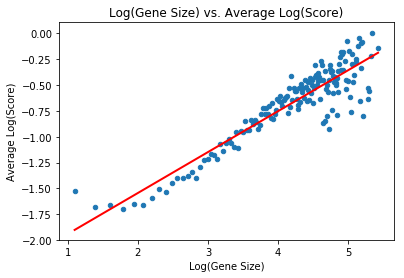

In [119]:
geneLog.plot('geneLog', 'avgScoresLog', kind='scatter', title='Log(Gene Size) vs. Average Log(Score)')
plt.xlabel('Log(Gene Size)')
plt.ylabel('Average Log(Score)')

plt.plot(minMaxGeneLog, predsGeneLog, c='red', linewidth=2)

# ----- Update for Friday, March 16 -----

## Regression Results

Numerical summaries of regression results

In [120]:
# print the coefficients
resultsGeneLog.params

Intercept   -2.337667
geneLog      0.396442
dtype: float64

In [121]:
# print the confidence intervals for the model coefficients
resultsGeneLog.conf_int()

,0,1
Intercept,-2.453378,-2.221956
geneLog,0.369348,0.423536


In [122]:
# print the p-values for the model coefficients
resultsGeneLog.pvalues

Intercept    2.054273e-84
geneLog      5.857536e-65
dtype: float64

In [123]:
# print the r-squared value for the model
resultsGeneLog.rsquared

0.84091514192313677

In [124]:
# print the full regression summary
resultsGeneLog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avgScoresLog   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     835.2
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           5.86e-65
Time:                        15:39:33   Log-Likelihood:                 75.425
No. Observations:                 160   AIC:                            -146.8
Df Residuals:                     158   BIC:                            -140.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3377      0.059    -39.902      0.000      -2.453      -2.222
geneLog        0.3964      0.014     28.899      0.000       0.369       0.424
==============================================================================
Omnibus:                       24.358   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.010
Skew:                          -0.878   Prob(JB):                     6.79e-08
Kurtosis:                       4.367   Cond. No.                         21.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# --------------------------------------------------

# ----- CORRECTED for Friday, March 18 ----- 

### Residuals

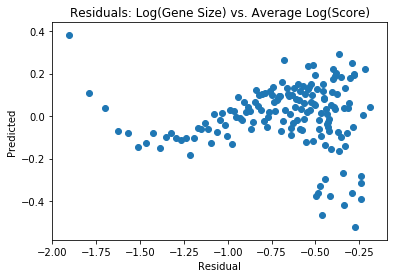

In [137]:
residualsGeneLog = []
actualGeneLog = list(geneLog.avgScoresLog)
predictedGeneLog = resultsGeneLog.fittedvalues

# For some reason, the predictedGeneLog Series started at index 1.
# Reset the index so it starts at 0.
predictedGeneLog.reset_index(drop=True, inplace=True)

for x in range(0, len(actualGeneLog)):
    actualScore = actualGeneLog[x]
    predictedScore = predictedGeneLog[x]
    residual = actualScore - predictedScore
    residualsGeneLog.append(residual)
    
plt.scatter(np.array(predictedGeneLog), np.array(residualsGeneLog))
plt.title('Residuals: Log(Gene Size) vs. Average Log(Score)')
plt.ylabel('Predicted')
plt.xlabel('Residual')

# --------------------------------------------------

# Multiple Linear Regression

Now we'll try a multiple linear regression using Log(Gene Size) and Log(Taxon Size) as predictor variables and Score as the response variable.

In [126]:
colsToUse = taxonLogAndScores.columns.difference(geneLogAndScores.columns)
colsToUse

taxonAndGene = pd.merge(geneLogAndScores, taxonLogAndScores[colsToUse], left_index=True, right_index=True, how='outer')
taxonAndGene.head()

,geneLog,scores,taxonLog
0,2.70805,0.096137,3.091042
1,2.70805,0.329889,5.087596
2,2.70805,0.329889,5.056246
3,2.70805,0.379192,6.936343
4,2.70805,0.065285,3.526361


In [127]:
resultsTaxonLogGeneLog = smf.ols(formula='scores ~ taxonLog + geneLog', data=taxonAndGene).fit()
resultsTaxonLogGeneLog.params

Intercept   -0.204638
taxonLog     0.080568
geneLog      0.126666
dtype: float64

In [128]:
resultsTaxonLogGeneLog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 scores   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 1.911e+06
Date:                Thu, 15 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:39:56   Log-Likelihood:            -1.8600e+06
No. Observations:            10104132   AIC:                         3.720e+06
Df Residuals:                10104129   BIC:                         3.720e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2046      0.000   -691.389      0.000      -0.205      -0.204
taxonLog       0.0806   6.08e-05   1324.357      0.000       0.080       0.081
geneLog        0.1267   8.81e-05   1437.776      0.000       0.126       0.127
==============================================================================
Omnibus:                  3946067.015   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29355921.343
Skew:                           1.700   Prob(JB):                         0.00
Kurtosis:                      10.627   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ----- Update for Friday, March 16 -----

### 3 Residual Plots:
- geneLog vs residuals
- taxonLog vs residuals
- predicted vs residuals

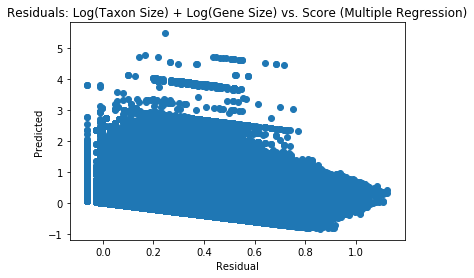

In [140]:
residualsTaxonLogGeneLog = []
actualTaxonLogGeneLog = list(taxonAndGene.scores)
predictedTaxonLogGeneLog = resultsTaxonLogGeneLog.fittedvalues

for x in range(0, len(actualTaxonLogGeneLog)):
    actualScore = actualTaxonLogGeneLog[x]
    predictedScore = predictedTaxonLogGeneLog[x]
    residual = actualScore - predictedScore
    residualsTaxonLogGeneLog.append(residual)
    
plt.scatter(np.array(predictedTaxonLogGeneLog), np.array(residualsTaxonLogGeneLog))
plt.title('Residuals: Log(Taxon Size) + Log(Gene Size) vs. Score (Multiple Regression)')
plt.ylabel('Predicted')
plt.xlabel('Residual')

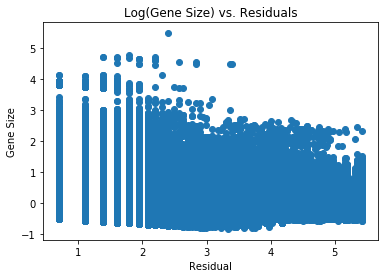

In [141]:
plt.scatter(np.array(taxonAndGene.geneLog), np.array(residualsTaxonLogGeneLog))
plt.title('Log(Gene Size) vs. Residuals')
plt.ylabel('Gene Size')
plt.xlabel('Residual')

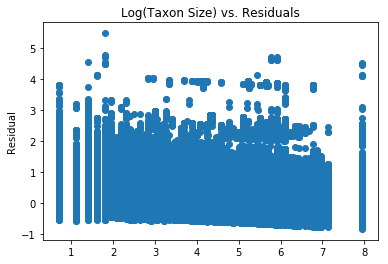

In [142]:
plt.scatter(np.array(taxonAndGene.taxonLog), np.array(residualsTaxonLogGeneLog))
plt.title('Log(Taxon Size) vs. Residuals')
plt.ylabel('Taxon Size')
plt.ylabel('Residual')

# ----------------------------------------

# @TODO

### Add new multiple regression: geneLog and taxonLog vs. average score of combination
### Add regression table (r-squared)
### Add 3 residual plots:
- geneLog vs residuals
- taxonLog vs residuals
- predicated vs residuals